In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Plot style
sns.set()
%pylab inline
pylab.rcParams['figure.figsize'] = (6, 4)

Populating the interactive namespace from numpy and matplotlib


In [3]:
%%html
<style>
.pquote {
  text-align: left;
  margin: 40px 0 40px auto;
  width: 70%;
  font-size: 1.5em;
  font-style: italic;
  display: block;
  line-height: 1.3em;
  color: #5a75a7;
  font-weight: 600;
  border-left: 5px solid rgba(90, 117, 167, .1);
  padding-left: 6px;
}
.notes {
  font-style: italic;
  display: block;
  margin: 40px 10%;
}
img + em {
  text-align: center;
  display: block;
  color: gray;
  font-size: 0.9em;
  font-weight: 600;
}
</style>

$$
\newcommand\bs[1]{\boldsymbol{#1}}
$$

<span class='notes'>
    This content is part of a series following the chapter 3 on probability from the [Deep Learning Book](http://www.deeplearningbook.org/) by Goodfellow, I., Bengio, Y., and Courville, A. (2016). It aims to provide intuitions/drawings/python code on mathematical theories and is constructed as my understanding of these concepts.
</span>

# 3.9 Common probability distributions


The aim of this chapter is to cover some common probability distributions that we may encounter a lot in data science, machine learning, deep learning.

But first, what is a probability distribution? It is a function that describe the probability of occurrence of all possible outcomes of a variable.


## 3.9.1 Bernoulli distribution

The Bernoulli distribution is a **discrete probability distribution** describing the probability of the outcomes of a binary variable (a variable that can take only two different values). So it is only the probability of each of these two possible outcomes.

### Example 13.

Let's start straight away with an example.

You want to get your driving license. The outcome is either positive and you can legally drive either negative and you should wait to get a car. Let's say that it is $0$ if you fail and $1$ if you succeed.

The Bernoulli distribution is the description of the probability of failure and the probability of success. For exemple, let's say that the probability of sucess is $0.7$ and the probability of failure is $0.3$. The probability distribution will have the following shape:

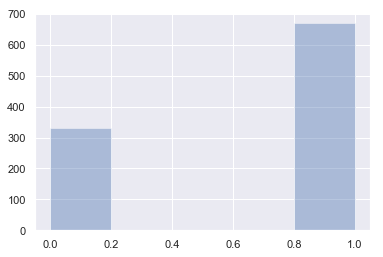

In [43]:
sucess = np.random.binomial(n=1, p=0.7, size=1000)

sns.distplot(sucess, kde=False)


Let's see what I have done here.

I created a random variable which values are drawn from a binomial distribution (thanks to the Numpy function `random.binomial()`). We'll see later that the Bernoulli distribution is a special case of a binomial function. Here it is a Bernoulli distribution because I set the parameter `n` to $1$ (cf. later).

The second parameter is the probability. We said that we have 70% chance to pass the exam and get the driving license so I set it to $0.7$.

The last parameter is the number of times we did the experiment (hope you don't have to do the test 1000 times).

Then I plotted the results with the library `Seaborn`. The function `distplot` takes the random variable as the first parameter. The second one is only to avoid to plot a gaussian kernel density estimate on the top of the plot.

We can see that we have around 700 of success and 300 of failure.

This is the **representation of a Bernoulli distribution**.

**Notes**: we studied here a common probability distribution: Bernoulli. We can consider that it is a category of distributions different according to the parameter we use. Here the only parameter is the probability of success but we'll see that some distribution can take several parameters.

So now that we have a certain intuition about the Bernoulli distribution, we can be a bit more formal. This distribution is a function which output is binary. We'll call the probability of one possible outcome $p$ and the other $q$. The Bernoulli distribution says that $q = p - 1$.

In our preceeding example, $p=0.7$ and thus $q=1-0.7=0.3$.


## Binomial distribution

The Bernoulli distribution is a special case of the binomial distribution so it worth saying a word about it.

The binomial distribution is the probability distribution that describes the probability to get a specific combination of events in Bernoulli experiment (so with two possible outcomes).

### Example 14.

This time, we'll consider another coin flipping experiment. If the experiment is made from one flip, the probabilities can be describe by a Bernoulli distribution as we saw above. But if we repeat it multiple times and ask for instance, what is the probability to get exactly 3 heads in 10 flips?

To do it we'll see the formula used to compute the binomial distribution:

$$
P(N) = \frac{n!}{(n-N)! N!} p^N (1-p)^{n-N}
$$

with:

- $p$ is the probability to get one of the two outcomes that we'll call 'success' (in our last exemple, 'success' is associated with heads: $p=0.5$)
- $n$ is the number of trial (in our last example: 10 trials)
- $N$ is the total number of successes (in our last exemple: 3 succcesses)
- $n!$ is pronounced 'n factorial' and means that we multiply $n$ with $n-1$ with $n-2$... until that $n=1$. For instance $5!=5\times4\times3\times2\times1$. More details [here](https://en.wikipedia.org/wiki/Factorial)

The first part

$$
P(N) = \frac{n!}{(n-N)! N!}
$$

corresponds to the number of possible combinations. In the preceding example, we wanted to know the probability to get 3 heads in 10 flips. However there are a lot of different ways to get these 3 heads. For instance if we write the series of heads and tails we can have HHHTTTTTTT or HTHHTTTTTT etc.

This first part is multiplied with the probability to have 3 heads in 10 flips in a specific order given by:

$$
p^N (1-p)^{n-N}
$$

In the case of a head flipping experiment, the probability is 0.5 for both outcomes and since we want a specific result at each flip, the probability is $0.5^n$.

Let's calculate it for our example:

$$
\begin{align*}
P(3) &= \frac{10!}{(10 - 3)!\times3!} \times 0.5^{3} \times (1-0.5)^{10 - 3}\\\\
&=\frac{10\times9\times8\times7\times6\times5\times4\times3\times2}{ 7\times6\times5\times4\times3\times2 \times3\times2} \times 0.5^{3} \times 0.5^7
\end{align*}
$$

To have an idea let's calculate this probability.

In [63]:
(10*9*8)/(3*2) * 0.5**3 * 0.5**7

0.1171875

There is around 10% chance to get exactly 3 heads in 10 flips.

### Example 14

To get a better intuition, let's see what we have if the experiment is made only with 2 flips. Let's say that we want to calculate the probability to get exactly 1 heads:

$$
\begin{align*}
P(1) &= \frac{2!}{(2 - 1)!\times1!} \times 0.5^{1} \times (1-0.5)^{2 - 1}\\\\
&=\frac{2}{ 1 \times 1} \times 0.5^{1} \times 0.5^1
\end{align*}
$$

In [64]:
2 * 0.5**1 * 0.5

0.5

### Binomial distribution with Numpy

We saw above how to use Numpy to draw samples from a bernoulli distribution:

`np.random.binomial(n=1, p=0.7, size=1000)`

We said that the Bernoulli distribution is a special case of the Binomial distribution where the number of trials ($N$) is equal to 1.

We'll now use the same function to create binomial distributions.

### Example 16

We'll implement the example 13. Each experiment corresponds to 10 flips ($n=10$) and we said that a success is when we get a heads. The probability of success is thus $p=0.5$.

In [74]:
np.random.seed(123)
successes = np.random.binomial(n=10, p=0.5, size=100)
successes

array([6, 4, 4, 5, 6, 5, 8, 6, 5, 5, 4, 6, 5, 3, 5, 6, 4, 4, 5, 5, 6, 7,
       6, 5, 6, 4, 4, 4, 4, 6, 3, 5, 5, 5, 5, 4, 5, 7, 7, 5, 6, 3, 4, 5,
       7, 4, 5, 8, 5, 5, 3, 6, 5, 5, 4, 4, 5, 6, 7, 5, 6, 5, 6, 6, 7, 3,
       6, 4, 4, 5, 3, 7, 6, 6, 2, 5, 5, 3, 3, 6, 4, 6, 5, 5, 7, 7, 4, 2,
       4, 5, 6, 9, 4, 6, 5, 6, 3, 5, 4, 4])

The result returned by the function corresponds for each trial (here 100) to the number of 'successes'. For instance, in the first trial, there were 6 successes over the 10 flips.

Let's plot this to see what it looks like!

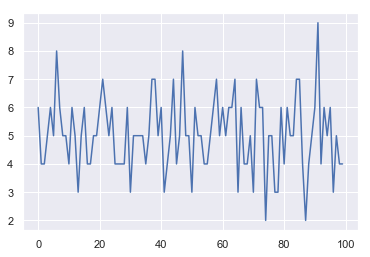

In [75]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(successes)

We can see that the values are centered around 5 which means that in average we get 5 heads on 10 trials. It makes sense because this is 50% of the trial and $p=0.5$.

#### Parameters

We now have all the tools to look at how the Bernoulli distribution is expressed in the book. It says that the Bernoulli distribution gives the probabilities that a binary random variable takes the value 0 or 1.

Only one parameter control this distribution: $\phi \in [0, 1]$ ($\phi$ is letter called *phi* and takes the value 0 or 1)  that gives the probability that the variable take the value 1.

The properies of this distribution are:

$$
P(\text{x}=1) = \phi
$$

As we said, $\phi$ is the probability to get a 1.

$$
P(\text{x}=0) = 1 - \phi
$$

Since the variable is binary and the total of probabilities is 1, the probability to get 0 is 1 minus the probability to get 1.

More generally we have:

$$
P(\text{x}=x) = \phi^x(1 - \phi)^{1-x}
$$

Since $\phi$ is equal either to 0 or 1 we have:

$$
P(\text{x}=0) = \phi^0(1 - \phi)^{1-0} = 1 - \phi
$$

and

$$
P(\text{x}=1) = \phi^1(1 - \phi)^{1-1} = \phi
$$

#### Expectation

The expectation of a random variable $\text{x}$ drawn from a Bernoulli distribution is:

$$
\mathbb{E}_{\text{x}}[\text{x}] = \phi
$$

Remind that the expected value is calculated with the following formula (cf. above):

$$
\mathbb{E}_{x\sim P}[f(x)] = \sum_x P(x)f(x)
$$

In the case of the Bernoulli variable, we have

$$
\mathbb{E}_{\text{x}}[\text{x}] = P(\text{x}=0)f(0) + P(\text{x}=1)f(1)
$$

And we saw that:

$$
P(\text{x}=1) = \phi
$$

and

$$
P(\text{x}=0) = 1 - \phi
$$

We thus have:

$$
\mathbb{E}_{\text{x}}[\text{x}] =(1 - \phi) \times 0 + \phi \times 1 = \phi
$$

#### Variance

The variance of a Bernoulli variable is


$$
Var_{\text{x}}(\text{x}) = \phi (1 - \phi)
$$

We saw earlier that the formula of the variance is:

$$
Var(f(x)) = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2]
$$

This can be expanded like that ([here](https://en.wikipedia.org/wiki/Variance)). First we can develop from $(a - b)^2 = a^2 - 2ab + b^2$:

$$
\begin{align*}
Var(f(x)) &= \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2]\\\\
&= \mathbb{E}[f(x)^2 - 2f(x)\mathbb{E}[f(x)] + \mathbb{E}[f(x)]^2]\\\\
&= \mathbb{E}[f(x)^2] - 2\mathbb{E}[f(x)]\mathbb{E}[f(x)] + \mathbb{E}[f(x)]^2\\\\
&= \mathbb{E}[f(x)^2] - 2\mathbb{E}[f(x)]^2 + \mathbb{E}[f(x)]^2\\\\
&= \mathbb{E}[f(x)^2] - \mathbb{E}[f(x)]^2
\end{align*}
$$

We saw that $\mathbb{E}_{\text{x}}[\text{x}] = \phi$ so $\mathbb{E}_{\text{x}}[\text{x}]^2 = \phi^2$. However, we still have to calculate $\mathbb{E}_{\text{x}}[\text{x}^2]$:

$$
\begin{align*}
\mathbb{E}[x^2] &= \sum_x P(\text{x}=x)x^2\\\\
&= P(\text{x}=0)\times 0^2 + P(\text{x}=1)\times 1^2\\\\
\end{align*}
$$

Again, we know that $P(\text{x}=1) = \phi$ and $P(\text{x}=0) = 1 - \phi$. So by replacing in the last equation we have:

$$
\begin{align*}
\mathbb{E}[x^2] = (1 - \phi)\times 0^2 + \phi \times 1^2 = \phi
\end{align*}
$$

Now that we have calculated $\mathbb{E}[x^2]$ we can replace these terms in the variance formula:

$$
\begin{align*}
Var(f(x)) &= \mathbb{E}[f(x)^2] - \mathbb{E}[f(x)]^2\\\\
&= \phi - \phi^2\\\\
&= \phi(1 - \phi)
\end{align*}
$$

3**0

# References

Nykamp DQ, “The idea of a probability density function.” From Math Insight. http://mathinsight.org/probability_density_function_idea

[2] https://www.mathsisfun.com/calculus/integration-introduction.html

https://www.mathsisfun.com/calculus/derivatives-introduction.html

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html



https://math.stackexchange.com/questions/23093/could-someone-explain-conditional-independence

https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html

https://en.wikipedia.org/wiki/Factorial

https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html